# **Khushdev Pandit**
# **Roll no: 2020211** 
# *Assignment Question-1*

#

# **Q1 Part-1**
* ##### (5 points) Report the estimated intrinsic camera parameters, i.e., focal length(s), skew parameter and principal point along with error estimates if available.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.facecolor'] = 'white'

# load all the images
images = glob.glob('Chess_Images/*.jpg')
print("Number of Chessboard Images clicked : ", len(images))

Number of Chessboard Images clicked :  28


In [3]:
# define the size of the checkerboard
checkerboard_size=(5,5)

# define the world coordinates of the checkerboard
objects_points = []
image_points = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

for image_name in tqdm(images):    
    img = cv2.imread(image_name)
    inverted_img = np.array(255 - img, dtype=np.uint8)
    gray_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)

    objp = np.zeros((1, checkerboard_size[0]*checkerboard_size[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)

    ret, corners = cv2.findChessboardCorners(image=gray_img, patternSize=checkerboard_size, flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        corners_refined = cv2.cornerSubPix(gray_img, corners, (11,11), (-1,-1), criteria)

        objects_points.append(objp)
        image_points.append(corners_refined)

        corners_img = cv2.drawChessboardCorners(img, checkerboard_size, corners_refined, ret)
        for corner in corners_refined.squeeze():
            coord = (int(corner[0]), int(corner[1]))
            cv2.circle(img=corners_img, center=coord, radius=33, color=(255, 0, 0), thickness=15)
        # plt.imsave("Chess_Corners/" + str(image_name.split('\\')[-1].split('.')[0] + '.png'), corners_img)
    else:
        print("Corners not found for image: ", image_name)

100%|██████████| 28/28 [00:34<00:00,  1.23s/it]


In [37]:
img = cv2.imread(images[0])
retVal, cameraInternalMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objects_points, image_points, img.shape[:2],None,None)

print("Error estimate: \n", retVal, "\n")
print("Internal Camera matrix : \n", cameraInternalMatrix, "\n")
print("Radial Distortion \n", distCoeffs[0], "\n")

print("Focal length :")
print("fx = ", cameraInternalMatrix[0,0])
print("fy = ", cameraInternalMatrix[1,1])
print("\nPrincipal point :")
print("cx = ", cameraInternalMatrix[0,2])
print("cy = ", cameraInternalMatrix[1,2])
print("\nSkew paramerer:")
print("s = ", cameraInternalMatrix[0,1])

Error estimate: 
 2.9029874512404708 

Internal Camera matrix : 
 [[3.59083306e+03 0.00000000e+00 2.18587381e+03]
 [0.00000000e+00 3.61682218e+03 1.15224849e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

Radial Distortion 
 [ 0.35342384 -3.46665081 -0.02122771 -0.01373224  5.72094171] 

Focal length :
fx =  3590.833064903618
fy =  3616.8221776162177

Principal point :
cx =  2185.873809980998
cy =  1152.2484917564666

Skew paramerer:
s =  0.0


In [5]:
np.savez('calibration.npz', mtx=cameraInternalMatrix, dist=distCoeffs, rvecs=rvecs, tvecs=tvecs)

In [6]:
data = np.load('calibration.npz')
cameraInternalMatrix = data['mtx']
distCoeffs = data['dist']
rvecs = data['rvecs']
tvecs = data['tvecs']

# **Q1 Part-2**
* ##### (5 points) Report the estimated extrinsic camera parameters, i.e., rotation matrix and translation vector for each of the selected images.

In [7]:
print("Length of Translation Vector: ", len(tvecs))
print("Length of Rotation Vector: ", len(rvecs))
print("Translation Vector Shape: ", np.array(tvecs).shape)
print("Rotation Vector Shape: ", np.array(rvecs).shape)

Length of Translation Vector:  28
Length of Rotation Vector:  28
Translation Vector Shape:  (28, 3, 1)
Rotation Vector Shape:  (28, 3, 1)


In [11]:
for i in range(len(tvecs)):
    tranlation_vector = tvecs[i].squeeze()
    Rotation_matrix, Jacobian_matrix = cv2.Rodrigues(rvecs[i])
    print("Translation Vector for Image-" + str(i+1) + ": ", tranlation_vector)
    print("Rotation Matrix for Image-" + str(i+1) + ": \n", Rotation_matrix)
    print()

Translation Vector for Image-1:  [-2.08240623 -1.5133837  12.7989665 ]
Rotation Matrix for Image-1: 
 [[ 0.99942363 -0.0127346  -0.0314681 ]
 [ 0.0128625   0.9999098   0.00386529]
 [ 0.03141603 -0.00426782  0.99949728]]

Translation Vector for Image-2:  [-1.18808451 -1.2212676  15.41348057]
Rotation Matrix for Image-2: 
 [[-0.04698458 -0.88119303  0.47041608]
 [ 0.99726649 -0.01449519  0.07245307]
 [-0.05702637  0.47253437  0.87946533]]

Translation Vector for Image-3:  [-4.01634327 -0.91581462 18.73782882]
Rotation Matrix for Image-3: 
 [[ 0.90025277 -0.246029    0.35918614]
 [ 0.31149245  0.94038066 -0.13658942]
 [-0.30416674  0.23484878  0.92321647]]

Translation Vector for Image-4:  [-2.94285076 -2.70809673 15.83170226]
Rotation Matrix for Image-4: 
 [[ 0.96448887 -0.19012082  0.18334475]
 [ 0.17959713  0.98106169  0.07254542]
 [-0.1936649  -0.03704106  0.98036823]]

Translation Vector for Image-5:  [-1.18142315 -1.85368307 14.60135143]
Rotation Matrix for Image-5: 
 [[ 0.78279454 

# **Q1 Part-3**
* ##### (5 points) Report the estimated radial distortion coefficients. Use the radial distortion coefficients to undistort 5 of the raw images and include them in your report. Observe how straight lines at the corner of the images change upon application of the distortion coefficients. Comment briefly on this observation.

In [12]:
print("Lens distortion coefficients :")
print("k1 = ", distCoeffs[0,0])
print("k2 = ", distCoeffs[0,1])
print("p1 = ", distCoeffs[0,2])
print("p2 = ", distCoeffs[0,3])
print("k3 = ", distCoeffs[0,4])

Lens distortion coefficients :
k1 =  0.35342384286946465
k2 =  -3.466650807348555
p1 =  -0.02122771187422184
p2 =  -0.013732237993644918
k3 =  5.720941706225883


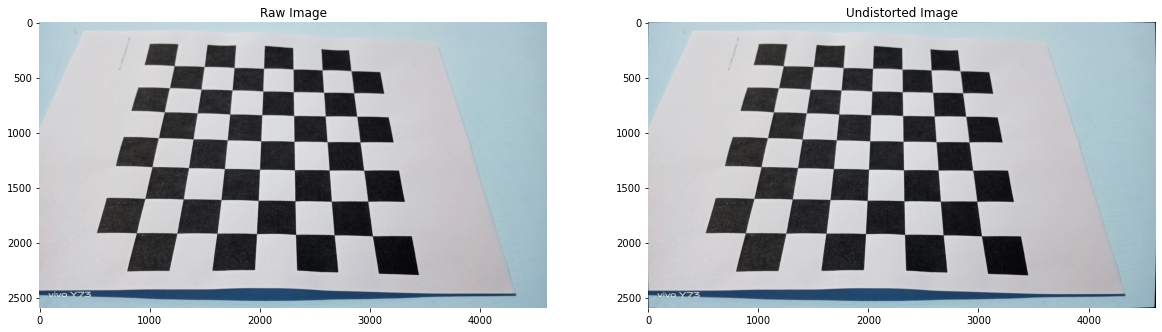

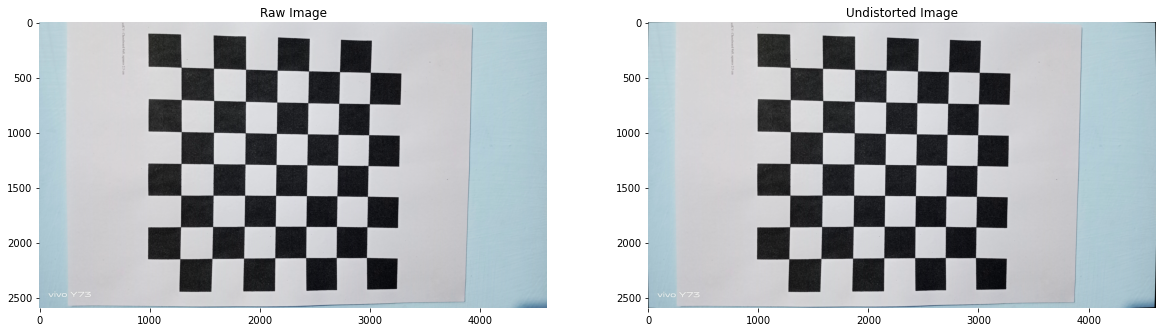

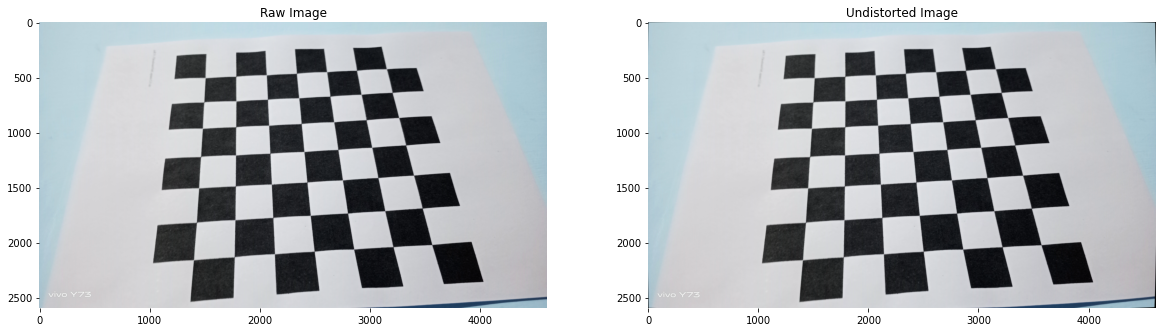

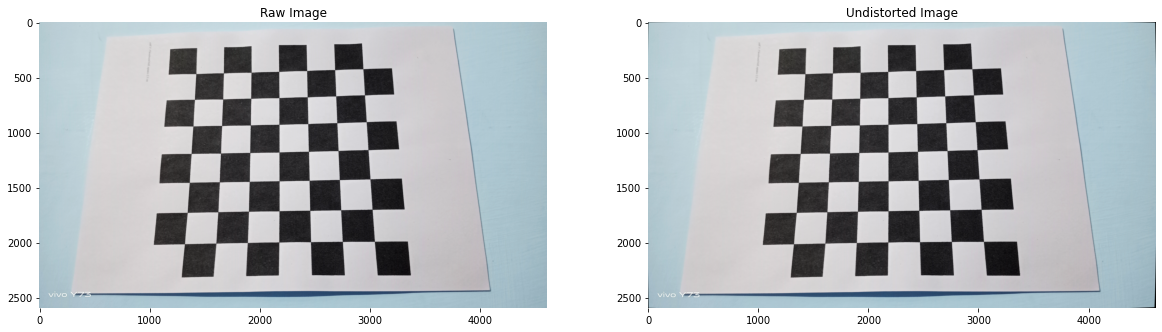

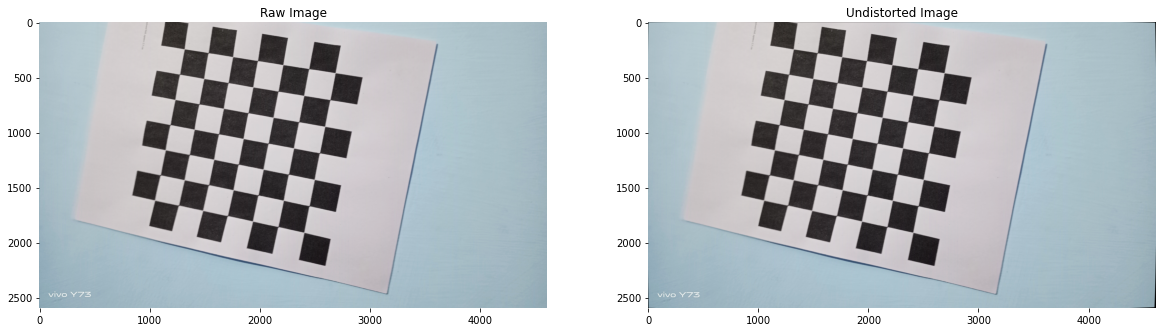

In [35]:
images_5 = ['Chess_Images/IMG_20230402_131656.jpg', 'Chess_Images/IMG_20230402_131411.jpg', 
            'Chess_Images/IMG_20230402_131614.jpg', 'Chess_Images/IMG_20230402_131648.jpg',
            'Chess_Images/IMG_20230402_131426.jpg']

for image in images_5:
    img = cv2.imread(image)
    # perform the undistortion operation on the image
    undistorted = cv2.undistort(img, cameraInternalMatrix, distCoeffs)

    # Save the original and undistorted images
    # plt.imsave("Undistorted_Image/Raw_image__" + str(image.split('\\')[-1].split('.')[0] + '.png'), img)
    # plt.imsave("Undistorted_Image/Undistorted_image__" + str(image.split('\\')[-1].split('.')[0] + '.png'), undistorted)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(img)
    ax[0].set_title("Raw Image")
    ax[0].set_aspect('equal')
    ax[0].set_facecolor('white')
    ax[0].grid(False)
    ax[0].set_frame_on(False)
    ax[1].imshow(undistorted)
    ax[1].set_title("Undistorted Image")
    ax[1].set_aspect('equal')
    ax[1].set_facecolor('white')
    ax[1].grid(False)
    ax[1].set_frame_on(False)
    plt.show()

#### Observation for the straight lines at the corner of the images change upon application of the distortion coefficients:

Straight lines at the corners of the image become somewhat more straight and less distorted on applying the radial distortion coefficients. Radial distortion is caused by the the curvature of the lens. When we perform undistortion of an image (such as for pincushion distortion), we distortion is corrected and a more accurate image scene is obtained.

# **Q1 Part-4**
* ##### (5 points) Compute and report the re-projection error using the intrinsic and ex-trinsic camera parameters for each of the 25 selected images. Plot the error using a bar chart. Also report the mean and standard deviation of the re-projection error.

In [15]:
print("Images Processed:")
errors = []
i = 0
for image_name in tqdm(images):
    # project 3D points to image plane
    reproj_image_points, _ = cv2.projectPoints(objects_points[i], rvecs[i], tvecs[i], cameraInternalMatrix, distCoeffs)
    
    # calculate error
    error = cv2.norm(image_points[i], reproj_image_points, cv2.NORM_L2)/len(reproj_image_points)
    errors.append(error)
    i += 1

Images Processed:


100%|██████████| 28/28 [00:00<00:00, 5297.75it/s]


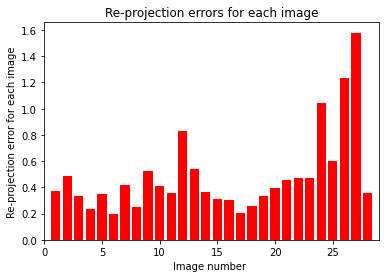

In [16]:
plt.bar(np.arange(1, len(errors) + 1), errors, 0.8, color='r')
plt.title('Re-projection errors for each image')
plt.xlabel('Image number ')
plt.ylabel('Re-projection error for each image')
plt.xlim([0, len(images)+1])
plt.show()

In [17]:
# calculate mean and standard deviation of re-projection error
mean_error = np.mean(errors)
std_dev_error = np.std(errors)

print('Mean Re-projection error for all Images:', mean_error)
print('Standard deviation of Re-projection error for all Images:', std_dev_error)

Mean Re-projection error for all Images: 0.48873697481323536
Standard deviation of Re-projection error for all Images: 0.31341515953042837


# **Q1 Part-5**
* ##### 5. (10 points) Plot figures showing corners detected in the image along with the corners after the re-projection onto the image for all the 25 images. Comment on how is the reprojection error computed.

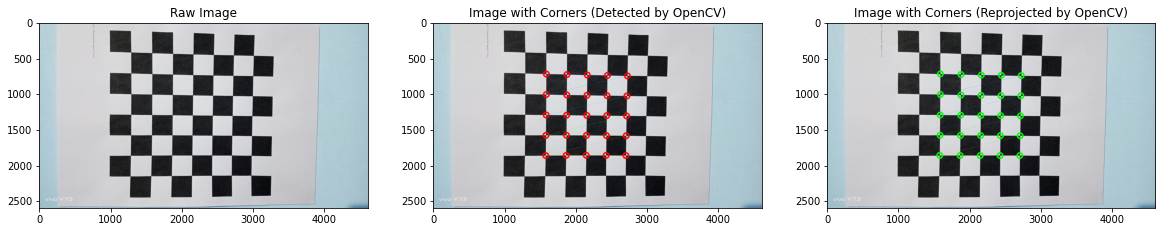

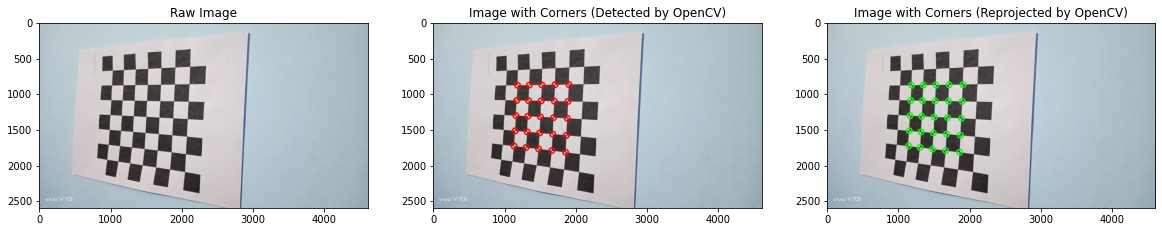

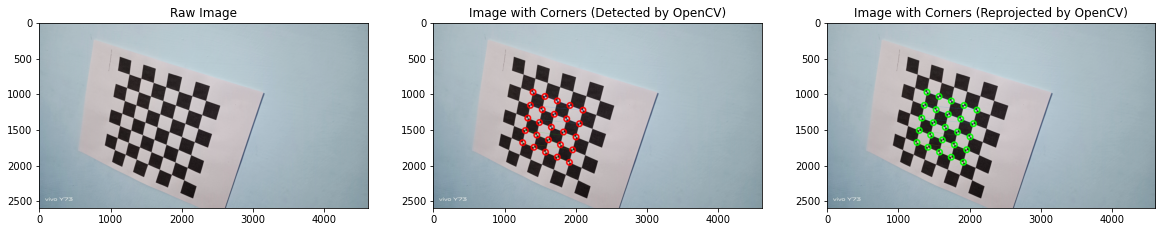

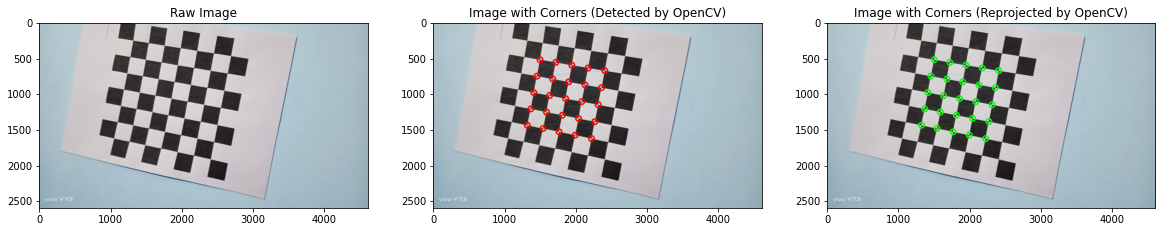

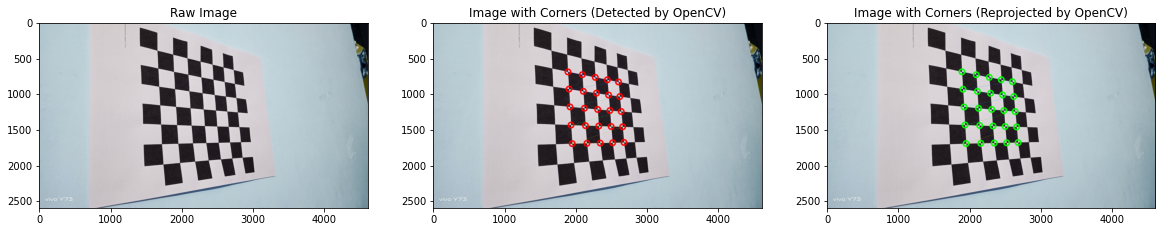

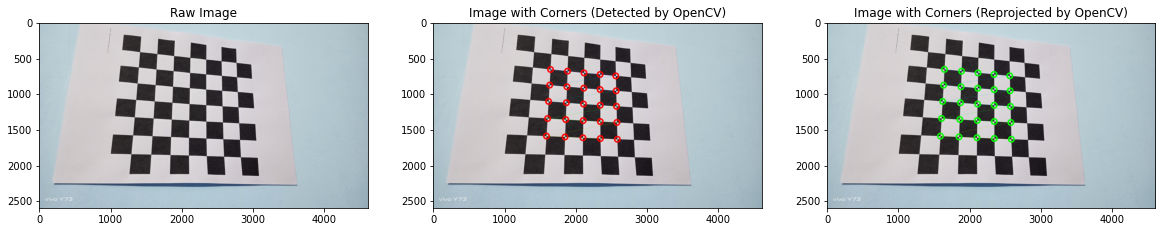

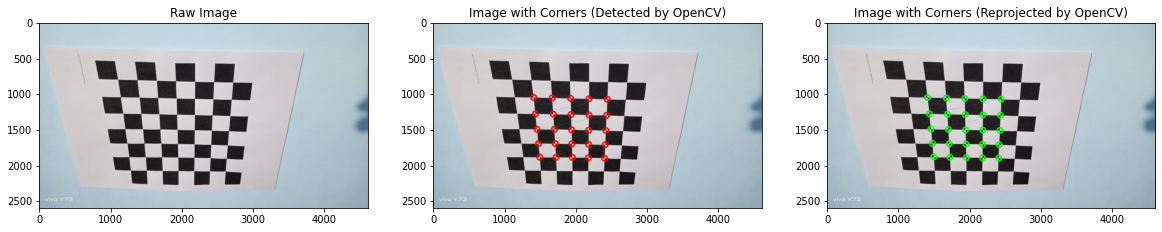

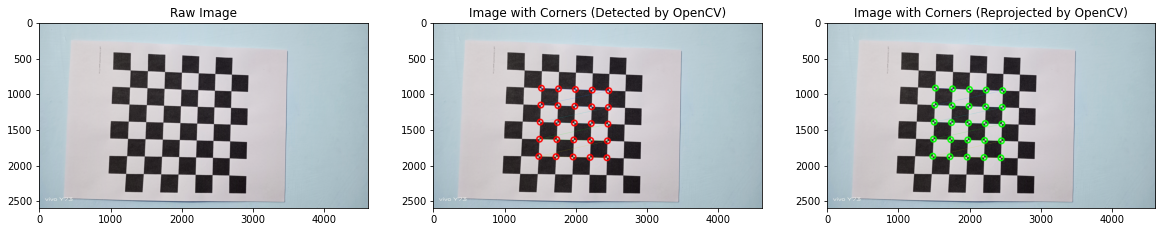

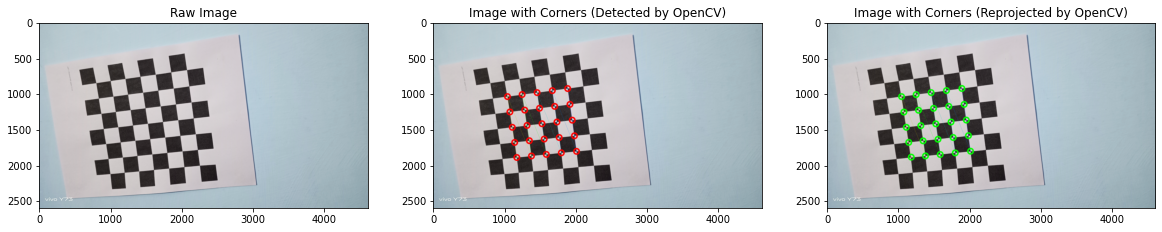

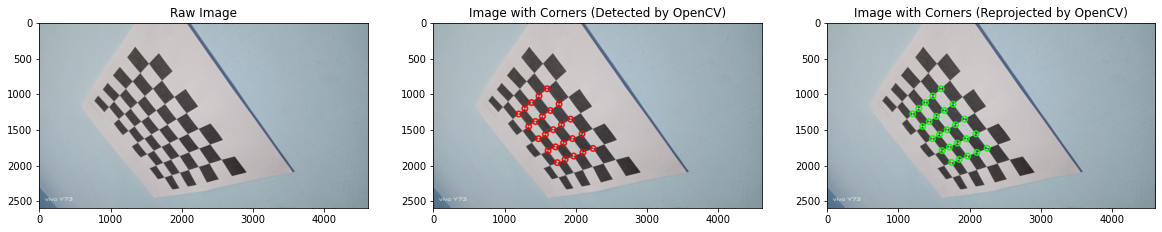

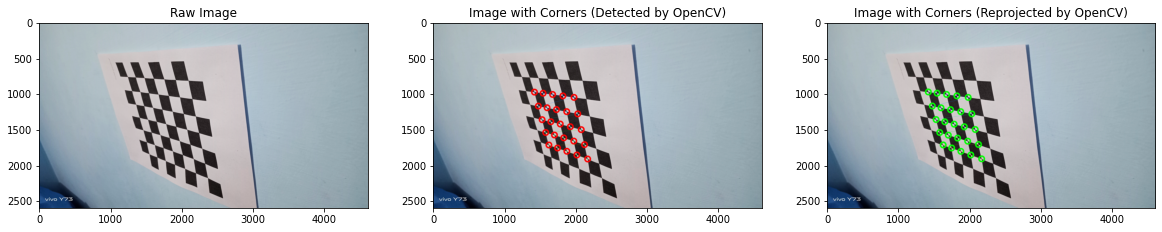

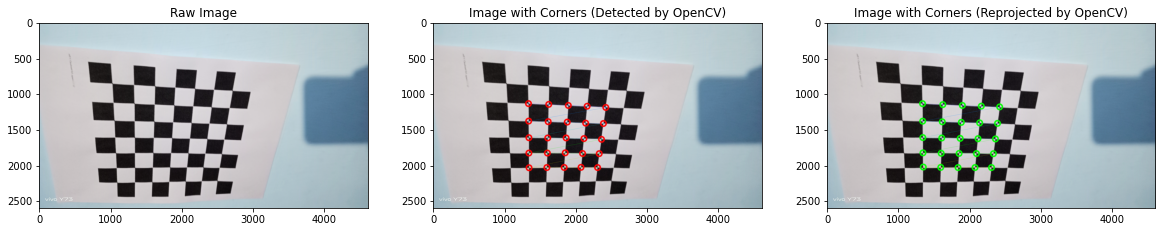

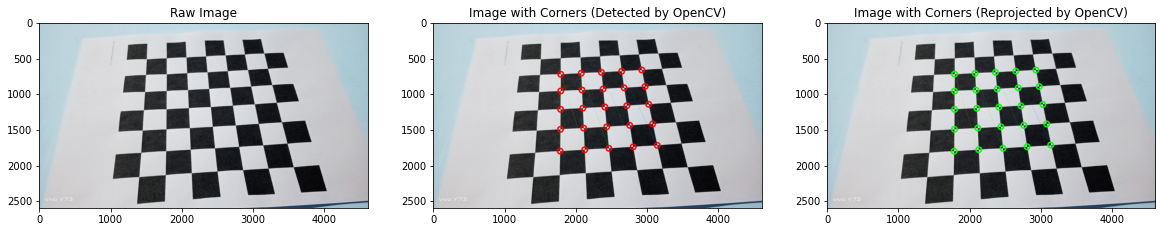

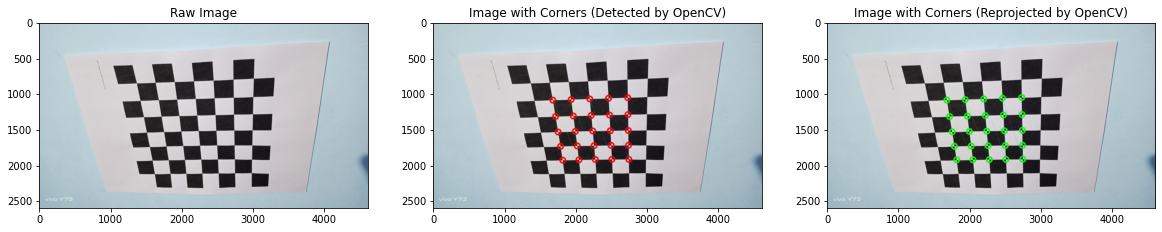

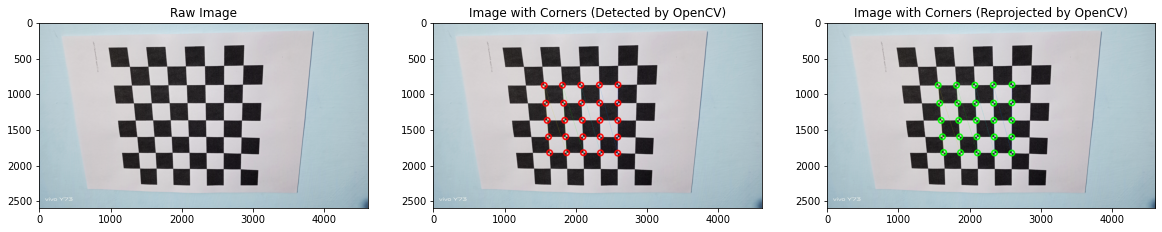

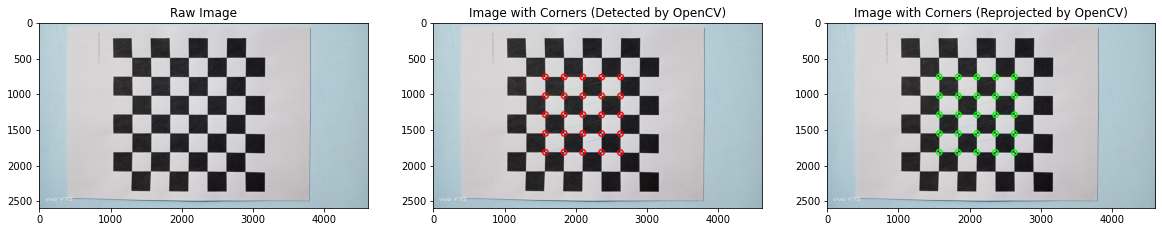

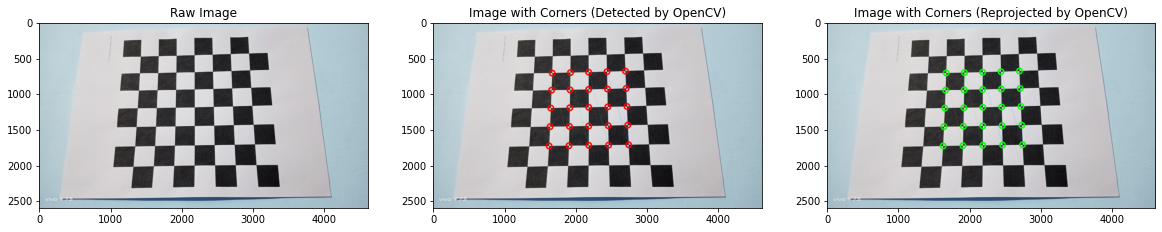

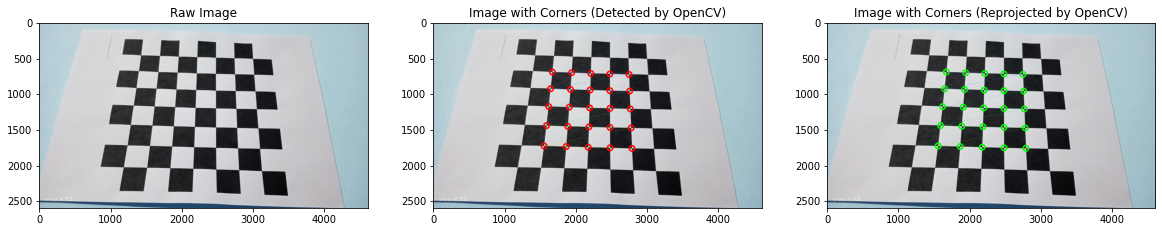

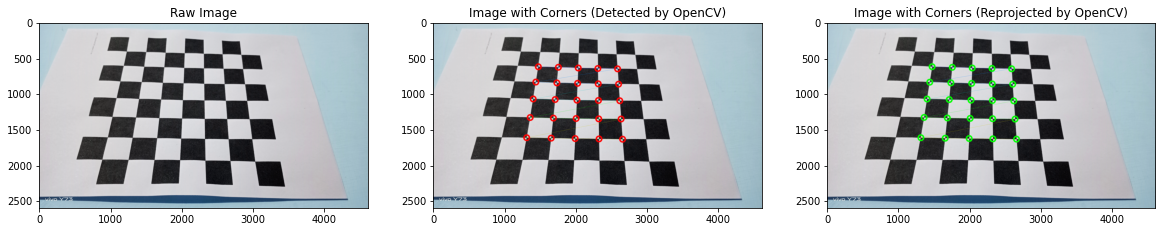

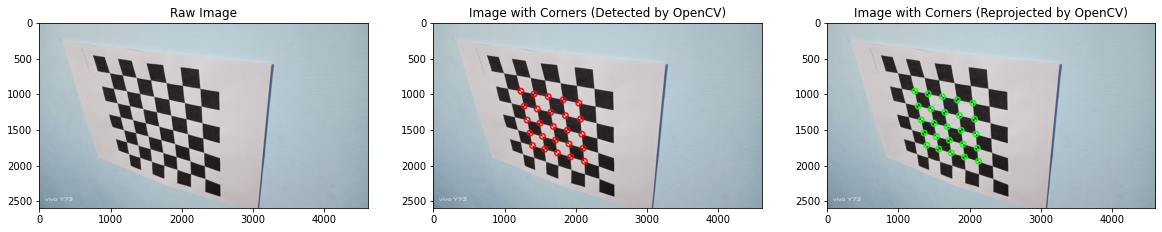

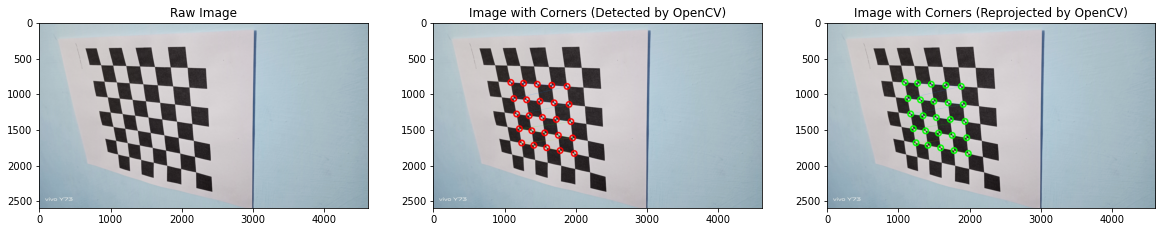

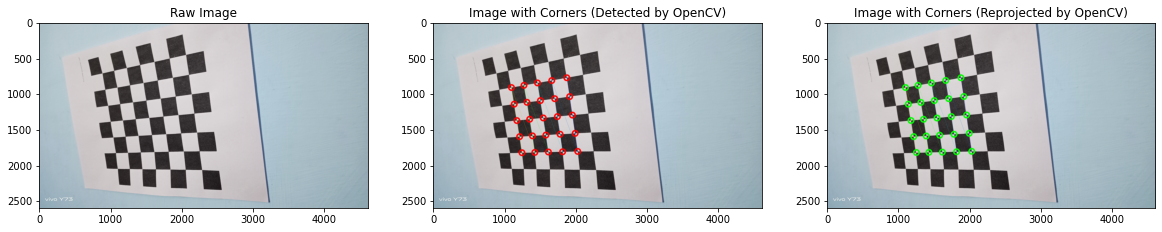

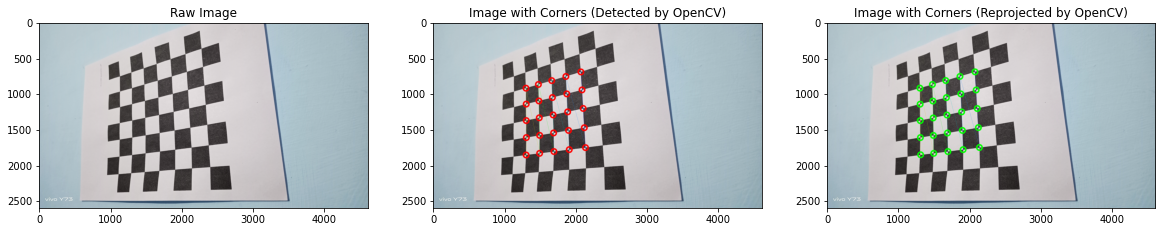

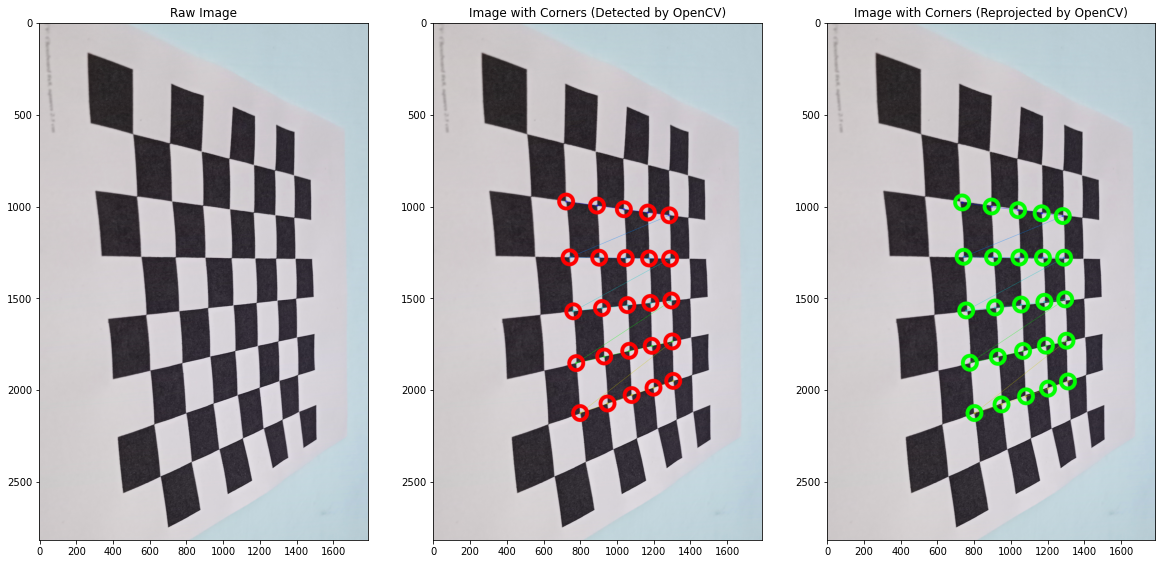

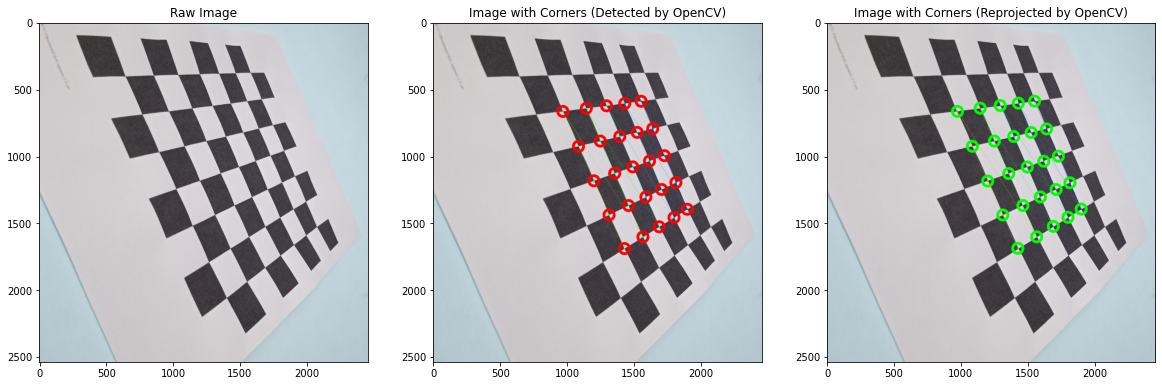

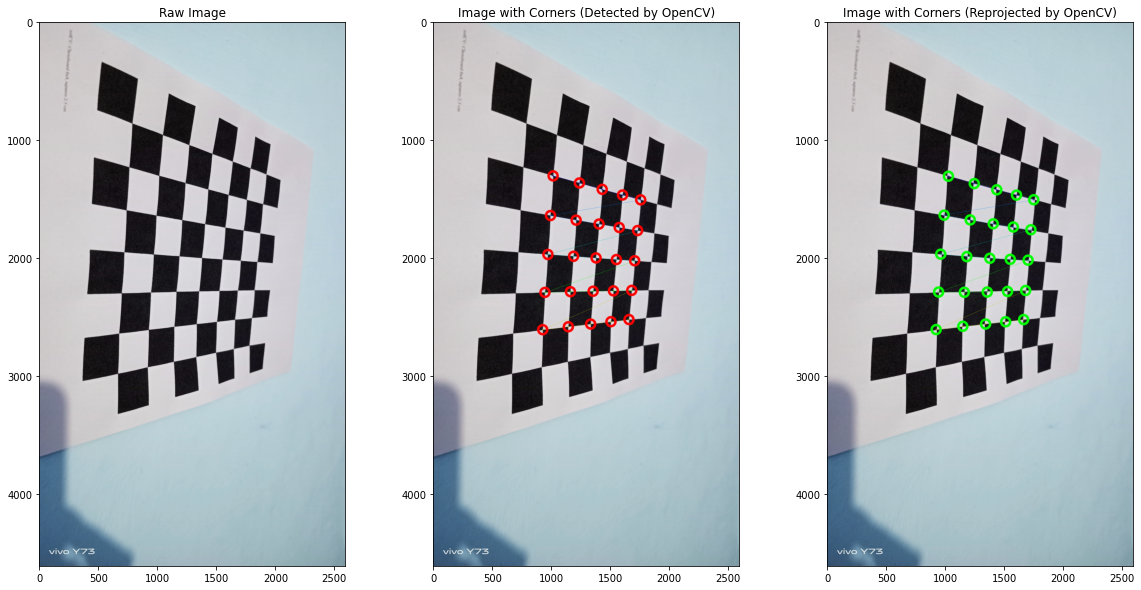

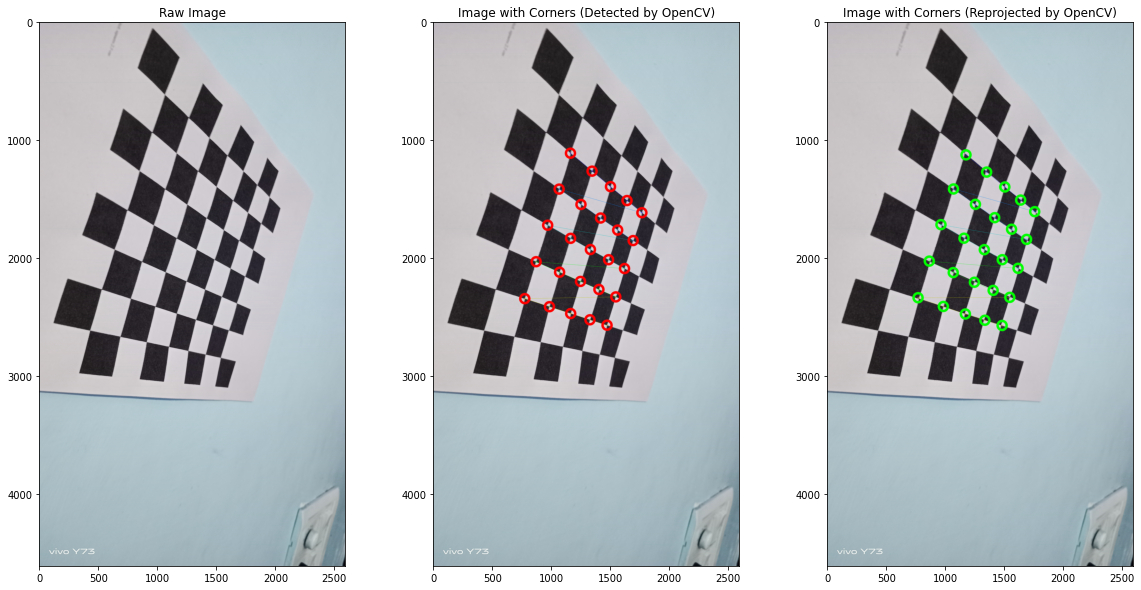

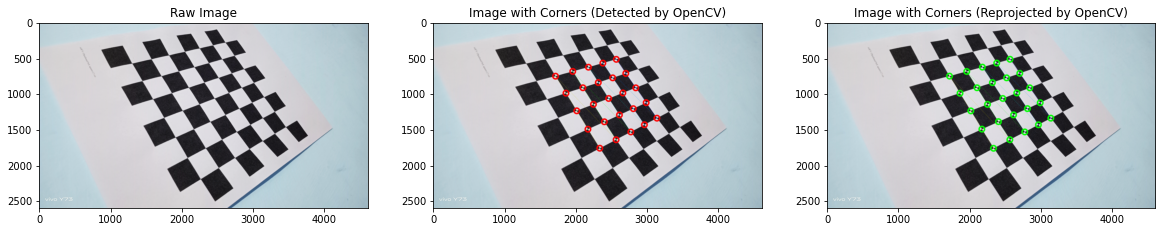

In [26]:
i = 0
for image_name in images:
    img = cv2.imread(image_name)    
    reproj_image_points, _ = cv2.projectPoints(objects_points[i], rvec=rvecs[i], tvec=tvecs[i], 
                                cameraMatrix=cameraInternalMatrix, distCoeffs=distCoeffs)
    
    corners_img = cv2.drawChessboardCorners(img.copy(), checkerboard_size, image_points[i], True)
    # print(image_points[i].shape)
    for corner in image_points[i].squeeze():
        coord = (int(corner[0]), int(corner[1]))
        cv2.circle(img=corners_img, center=coord, radius=38, color=(255, 0, 0), thickness=20)
        
        
    reprojected_img = cv2.drawChessboardCorners(img.copy(), checkerboard_size, reproj_image_points, True)
    # print(reproj_image_points[i].shape)
    for corner in reproj_image_points.squeeze():
        coord = (int(corner[0]), int(corner[1]))
        cv2.circle(img=reprojected_img, center=coord, radius=38, color=(0, 255, 0), thickness=20)
    i += 1
    
    # plt.imsave("Chess_Corners_With_ReProjection/Without_Reproj_" + str(image_name.split('\\')[-1].split('.')[0] + '.png'), corners_img)
    # plt.imsave("Chess_Corners_With_ReProjection/With_Reproj_" + str(image_name.split('\\')[-1].split('.')[0] + '.png'), reprojected_img)
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(img)
    ax[0].set_title("Raw Image")
    ax[1].imshow(corners_img)
    ax[1].set_title("Image with Corners (Detected by OpenCV)")
    ax[2].imshow(reprojected_img)
    ax[2].set_title("Image with Corners (Reprojected by OpenCV)")
    plt.show()

#### Comment on how is the reprojection error computed.

The Reprojection error between the detected corners and the Re-projected corners is computed by the average of "L2 Norm" error or average "Euclidean distance" error for every image. 

# **Q1 Part-6**
* ##### (10 points) Compute the checkerboard plane normals nCi, i ∈ {1, ..25} for each of the 25 selected images in the camera coordinate frame of reference (Oc)

In [27]:
image_plane_normals = []
i = 0

for image_name in images:
    img = cv2.imread(image_name)
    _, rvec, tvec = cv2.solvePnP(objects_points[i], image_points[i], cameraInternalMatrix, distCoeffs)
    Rotation_Matrix, _ = cv2.Rodrigues(rvec)
    normal_to_plane = Rotation_Matrix.dot(np.array([0, 0, 1]))
    image_plane_normals.append(normal_to_plane)
    i += 1

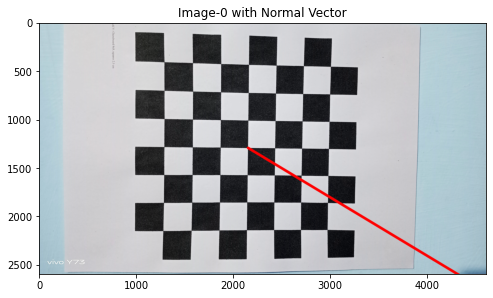

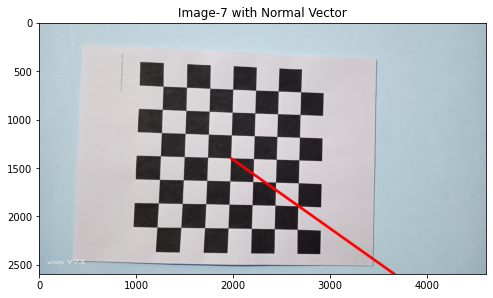

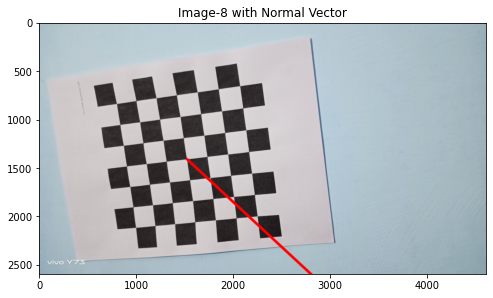

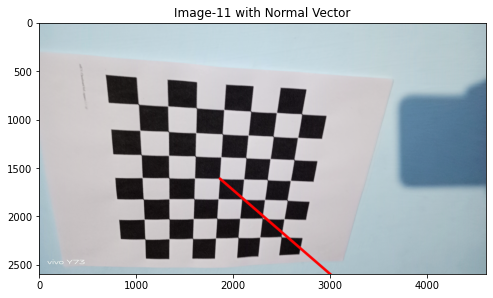

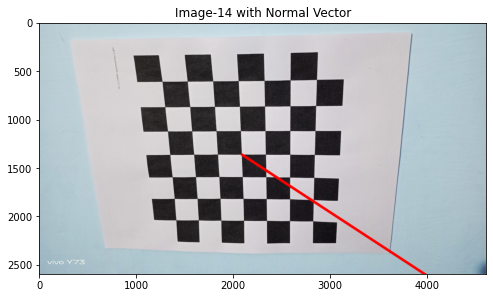

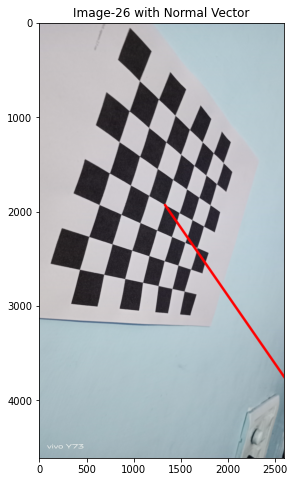

In [28]:
for i in range(len(images)):
    img = cv2.imread(images[i])
    mean_u = np.median(image_points[i][:,:, 0])
    mean_v = np.median(image_points[i][:,:, 1])
    
    # calculate z coordinate of the image plane
    z = -(image_plane_normals[i][0] * mean_u + image_plane_normals[i][1] * mean_v)  / image_plane_normals[i][2]

    # calculate end point of line of the normal vector on the image plane
    end_point = 200*np.array([mean_u, mean_v, z])
    
    # Drawing the normal vector on the image
    image_with_normal = cv2.line(img, (int(mean_u), int(mean_v)), (int(end_point[0]), int(end_point[1])), (255, 0, 0), thickness=25, lineType=8, shift=0)

    if i == 0 or i == 7 or i == 8 or i == 11 or i == 14 or i == 26:
        plt.figure(figsize=(8, 8))
        plt.imshow(image_with_normal)
        plt.title(f"Image-{i} with Normal Vector")
        plt.show()
        # name = images[i].split('\\')[-1].split('.')[0]
        # plt.imsave(f"Image_with_Normal_Vectors/Image-{name}_with_Normal_Vector.png", image_with_normal)

In [30]:
for i in range(len(image_plane_normals)):
    print("Image Number: ", i+1)
    print("Normal Vector to the Image Plane: ", image_plane_normals[i], "\n")

Image Number:  1
Normal Vector to the Image Plane:  [-0.03146808  0.00386531  0.99949728] 

Image Number:  2
Normal Vector to the Image Plane:  [0.47041608 0.07245307 0.87946533] 

Image Number:  3
Normal Vector to the Image Plane:  [ 0.35918614 -0.13658943  0.92321647] 

Image Number:  4
Normal Vector to the Image Plane:  [0.18334474 0.07254542 0.98036823] 

Image Number:  5
Normal Vector to the Image Plane:  [-0.61842823  0.21015149  0.75722049] 

Image Number:  6
Normal Vector to the Image Plane:  [-0.17728406  0.33326813  0.92601442] 

Image Number:  7
Normal Vector to the Image Plane:  [ 0.03064475 -0.43894875  0.89798936] 

Image Number:  8
Normal Vector to the Image Plane:  [-0.02211353  0.07506151  0.99693368] 

Image Number:  9
Normal Vector to the Image Plane:  [ 0.14492258 -0.03937949  0.98865904] 

Image Number:  10
Normal Vector to the Image Plane:  [ 0.56153417 -0.49226145  0.66510002] 

Image Number:  11
Normal Vector to the Image Plane:  [ 0.69423261 -0.35869318  0.6240